In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("C:/Users/Nikhil Kumar/Downloads/cars94.csv")

In [3]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               37
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

<Axes: >

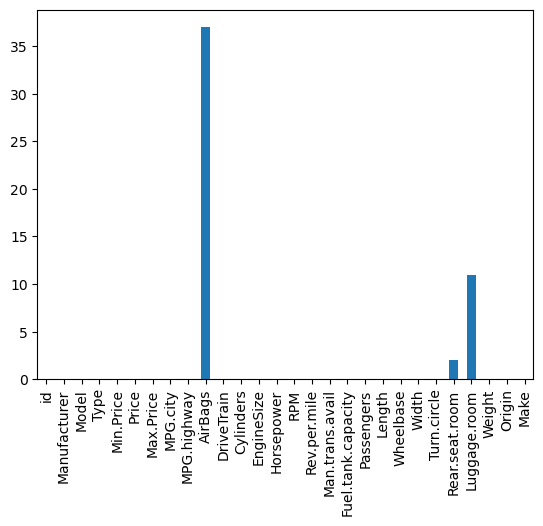

In [4]:
df.isna().sum().plot(kind='bar')  #missing values by visualization

In [5]:
# Airbags have 37 rows of null values
# Rear.seat.room 2 rows
# Luggage.room 11 rows

<Axes: >

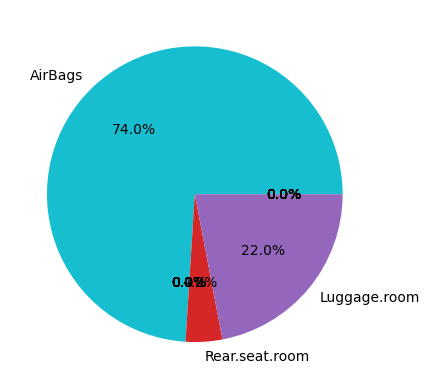

In [9]:
df.isna().sum().plot(kind='pie',autopct='%1.1f%%')

In [10]:
# Comments regarding percent

In [11]:
# filling null values
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [12]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [13]:
# 3. Discriptive Statistics

In [14]:
for i in df.columns:
    if df[i].dtypes!=object:
        print(i)
        print()
        print(df[i].describe())
        print('***********************************************************')

id

count    93.000000
mean     47.000000
std      26.990739
min       1.000000
25%      24.000000
50%      47.000000
75%      70.000000
max      93.000000
Name: id, dtype: float64
***********************************************************
Min.Price

count    93.000000
mean     17.125806
std       8.746029
min       6.700000
25%      10.800000
50%      14.700000
75%      20.300000
max      45.400000
Name: Min.Price, dtype: float64
***********************************************************
Price

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64
***********************************************************
Max.Price

count    93.000000
mean     21.898925
std      11.030457
min       7.900000
25%      14.700000
50%      19.600000
75%      25.300000
max      80.000000
Name: Max.Price, dtype: float64
***********************************************************
MP

In [15]:
# Those column which have near normal distribution plot their histogram plot.


id


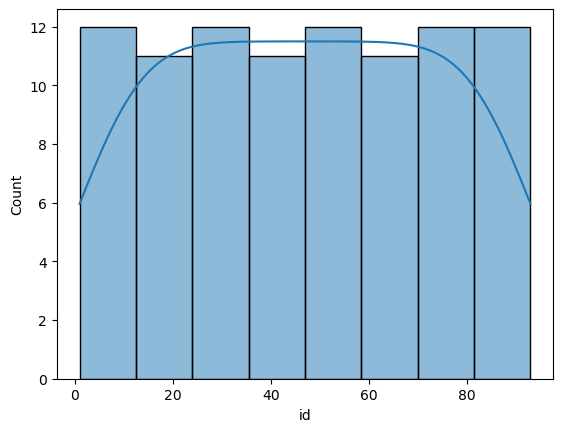

Min.Price


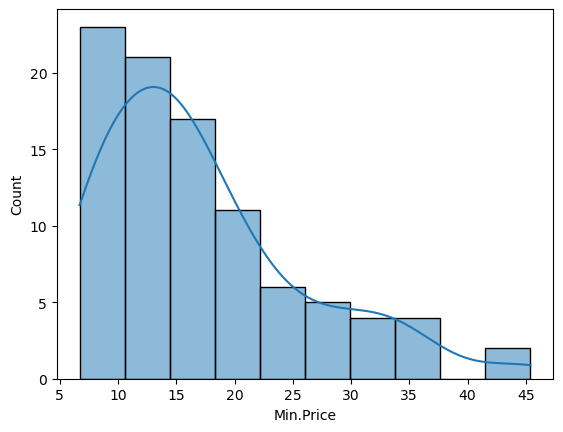

Price


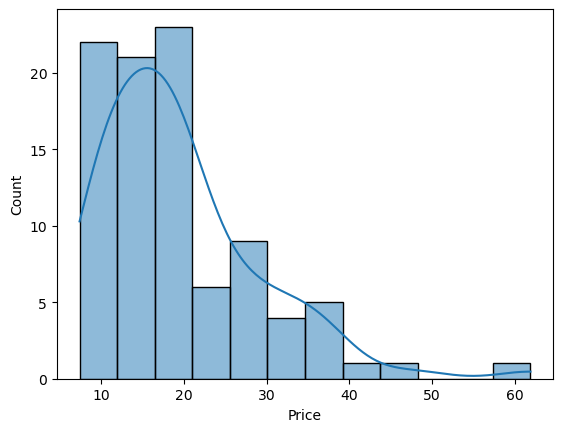

Max.Price


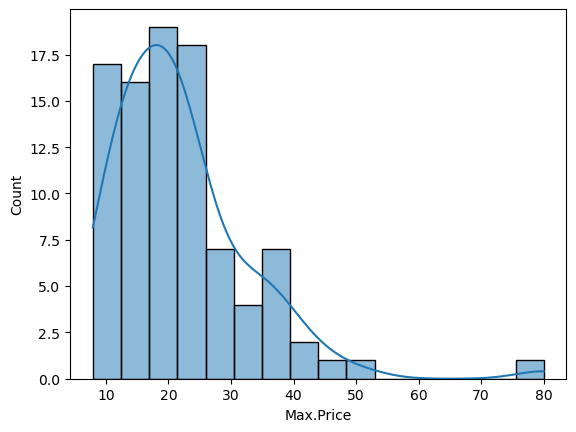

MPG.city


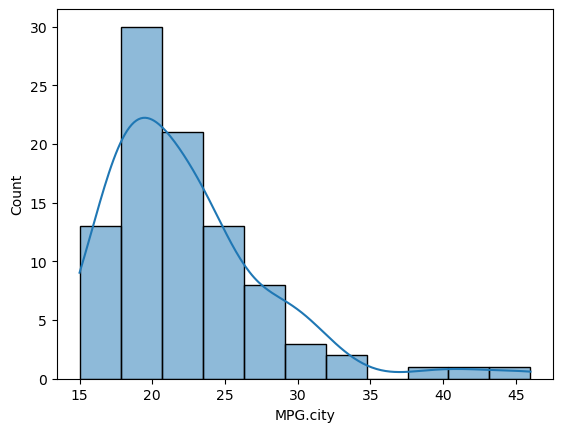

MPG.highway


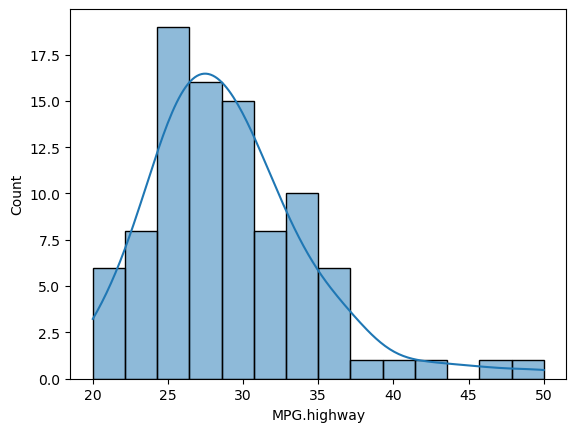

EngineSize


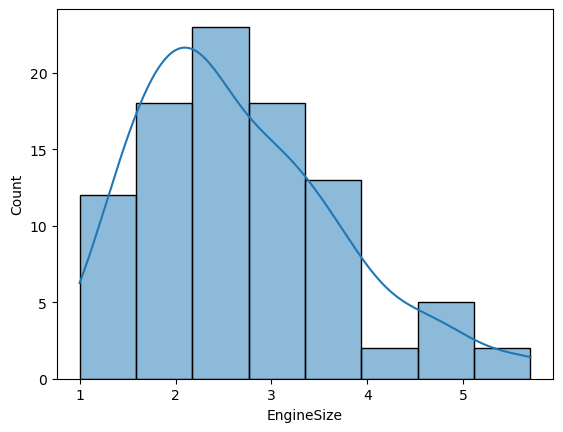

Horsepower


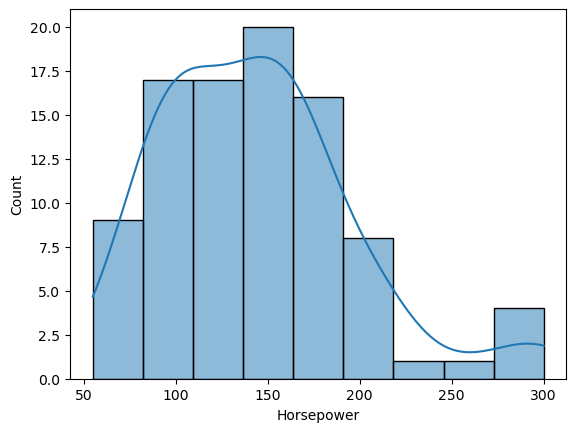

RPM


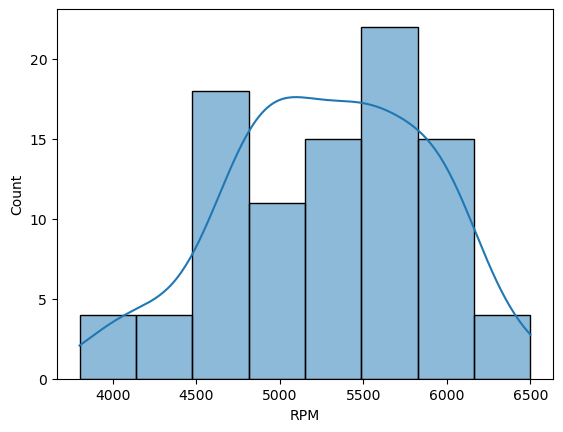

Rev.per.mile


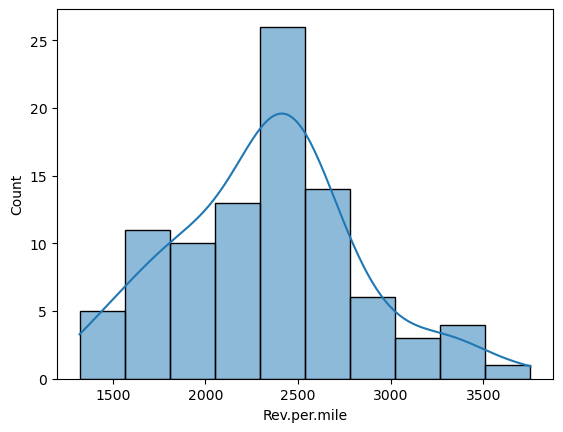

Fuel.tank.capacity


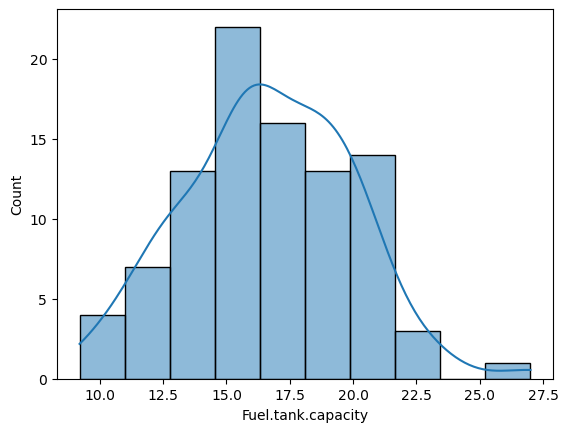

Passengers


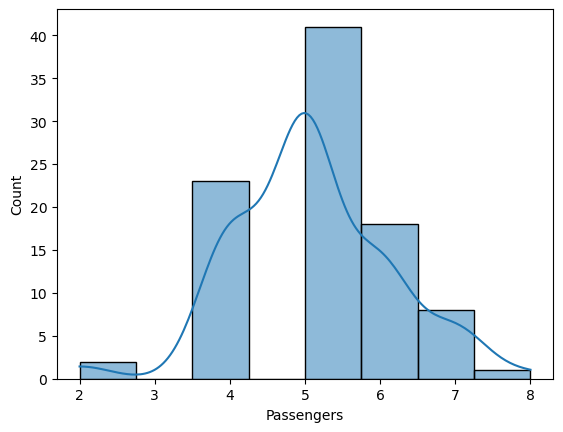

Length


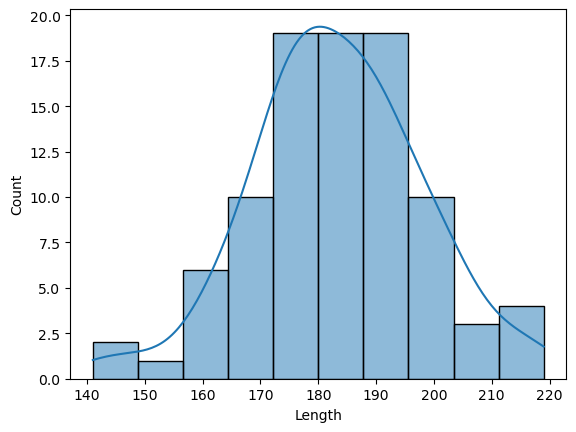

Wheelbase


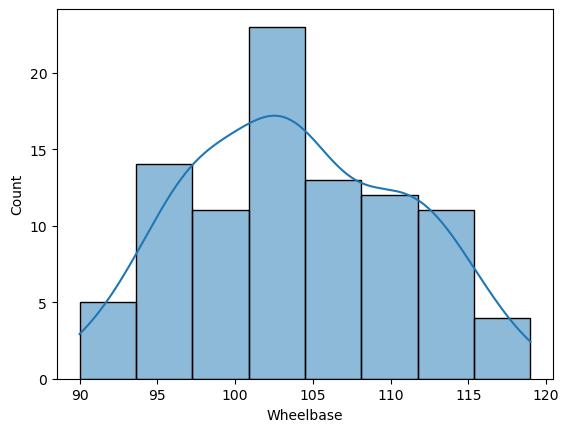

Width


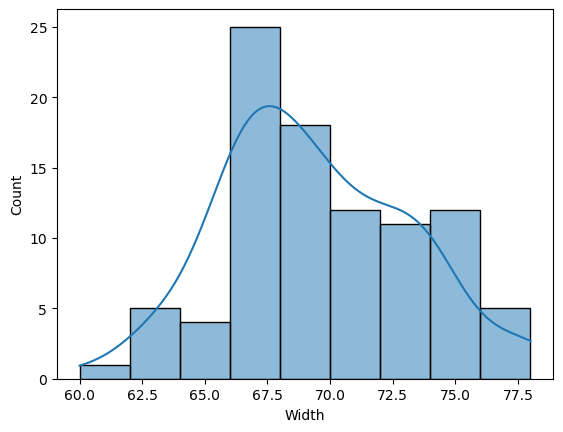

Turn.circle


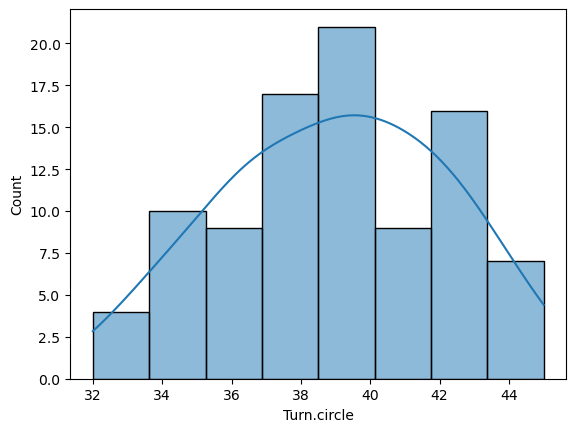

Rear.seat.room


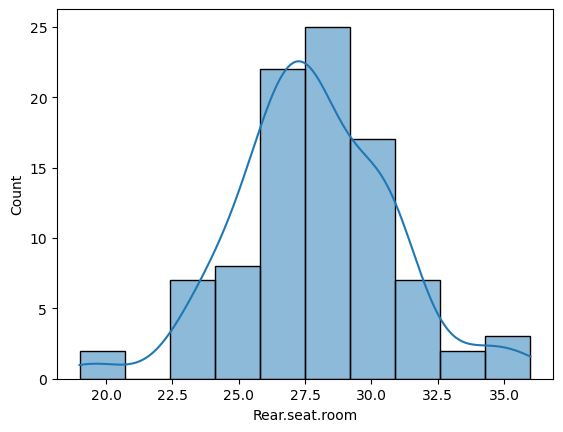

Luggage.room


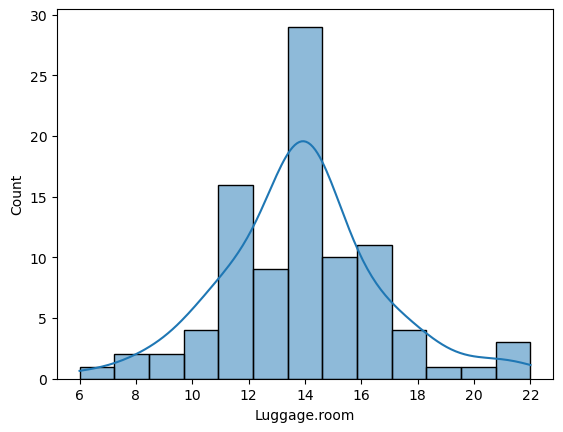

Weight


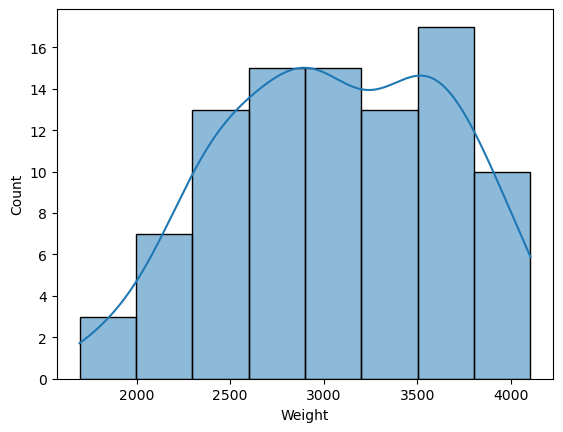

In [16]:
from matplotlib.pyplot import show
for i in df.columns:
    if df[i].dtypes!=object:
        sns.histplot(data=df,x=i,kde=True)
        print(i)
        show()

In [18]:
# write name of columns which r normally distributed

In [19]:
# 5. Geographical Analysis

In [20]:
df['Origin'].value_counts()

Origin
USA        48
non-USA    45
Name: count, dtype: int64

<Axes: xlabel='Origin'>

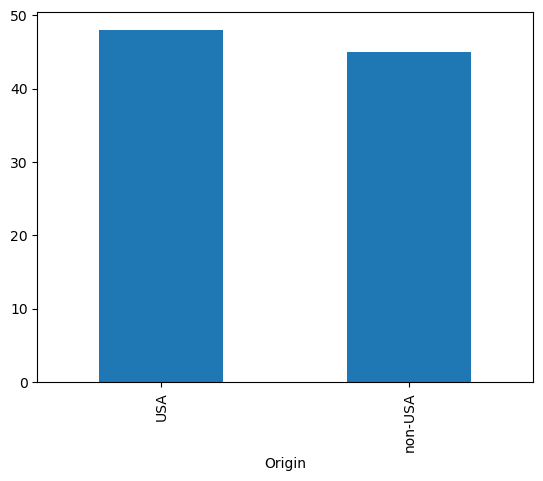

In [21]:
df['Origin'].value_counts().plot(kind='bar') #visually

In [22]:
# correlation

In [24]:
cat=[]
con=[]
for i in df.columns:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [25]:
Xcat=df[cat]
Xcon=df[con]

In [27]:
Xcon.corr()   #  checking correlation b/n all numeric columns

id  Min.Price     Price  Max.Price  MPG.city  \
id                  1.000000  -0.144463 -0.137277  -0.126567  0.161808   
Min.Price          -0.144463   1.000000  0.970601   0.906756 -0.622875   
Price              -0.137277   0.970601  1.000000   0.981580 -0.594562   
Max.Price          -0.126567   0.906756  0.981580   1.000000 -0.547811   
MPG.city            0.161808  -0.622875 -0.594562  -0.547811  1.000000   
MPG.highway         0.137317  -0.579966 -0.560680  -0.522561  0.943936   
EngineSize         -0.338286   0.645488  0.597425   0.535012 -0.710003   
Horsepower         -0.233012   0.802444  0.788218   0.744445 -0.672636   
RPM                 0.167772  -0.042598 -0.004955   0.025015  0.363045   
Rev.per.mile        0.226389  -0.470395 -0.426395  -0.374024  0.695857   
Fuel.tank.capacity -0.179034   0.635369  0.619480   0.581294 -0.813144   
Passengers         -0.142252   0.061236  0.057860   0.053216 -0.416856   
Length             -0.277911   0.553859  0.503628   0.442933 -0.666239   
Wheelbase          -0.244888   0.516758  0.500864   0.467501 -0.667108   
Width              -0.293592   0.492878  0.456028   0.408414 -0.720534   
Turn.circle        -0.275867   0.428603  0.392590   0.347785 -0.666389   
Rear.seat.room     -0.126129   0.361525  0.301888   0.241600 -0.380435   
Luggage.room       -0.161114   0.395783  0.354635   0.307020 -0.462204   
Weight             -0.220525   0.666554  0.647179   0.605142 -0.843139   

                    MPG.highway  EngineSize  Horsepower       RPM  \
id                     0.137317   -0.338286   -0.233012  0.167772   
Min.Price             -0.579966    0.645488    0.802444 -0.042598   
Price                 -0.560680    0.597425    0.788218 -0.004955   
Max.Price             -0.522561    0.535012    0.744445  0.025015   
MPG.city               0.943936   -0.710003   -0.672636  0.363045   
MPG.highway            1.000000   -0.626795   -0.619044  0.313469   
EngineSize            -0.626795    1.000000    0.732120 -0.547898   
Horsepower            -0.619044    0.732120    1.000000  0.036688   
RPM                    0.313469   -0.547898    0.036688  1.000000   
Rev.per.mile           0.587497   -0.824009   -0.600314  0.494764   
Fuel.tank.capacity    -0.786039    0.759306    0.711790 -0.333345   
Passengers            -0.466386    0.372721    0.009264 -0.467138   
Length                -0.542897    0.780283    0.550865 -0.441249   
Wheelbase             -0.615384    0.732484    0.486854 -0.467812   
Width                 -0.640359    0.867110    0.644413 -0.539721   
Turn.circle           -0.593683    0.778464    0.561216 -0.505651   
Rear.seat.room        -0.364284    0.473740    0.236871 -0.333847   
Luggage.room          -0.327732    0.618326    0.328568 -0.481744   
Weight                -0.810658    0.845075    0.738798 -0.427931   

                    Rev.per.mile  Fuel.tank.capacity  Passengers    Length  \
id                      0.226389           -0.179034   -0.142252 -0.277911   
Min.Price              -0.470395            0.635369    0.061236  0.553859   
Price                  -0.426395            0.619480    0.057860  0.503628   
Max.Price              -0.374024            0.581294    0.053216  0.442933   
MPG.city                0.695857           -0.813144   -0.416856 -0.666239   
MPG.highway             0.587497           -0.786039   -0.466386 -0.542897   
EngineSize             -0.824009            0.759306    0.372721  0.780283   
Horsepower             -0.600314            0.711790    0.009264  0.550865   
RPM                     0.494764           -0.333345   -0.467138 -0.441249   
Rev.per.mile            1.000000           -0.609710   -0.334976 -0.690233   
Fuel.tank.capacity     -0.609710            1.000000    0.472095  0.690461   
Passengers             -0.334976            0.472095    1.000000  0.485294   
Length                 -0.690233            0.690461    0.485294  1.000000   
Wheelbase              -0.636824            0.757674    0.694054  0.8236

<Axes: >

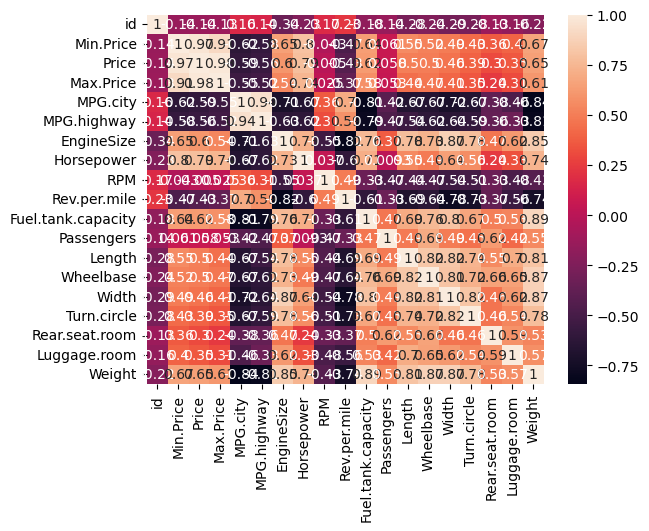

In [29]:
sns.heatmap(Xcon.corr(),annot=True)

<Axes: >

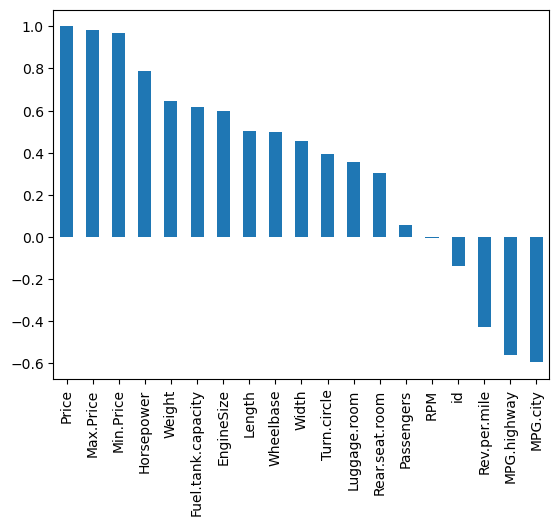

In [31]:
Xcon.corr()['Price'].sort_values(ascending=False).plot(kind='bar')

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


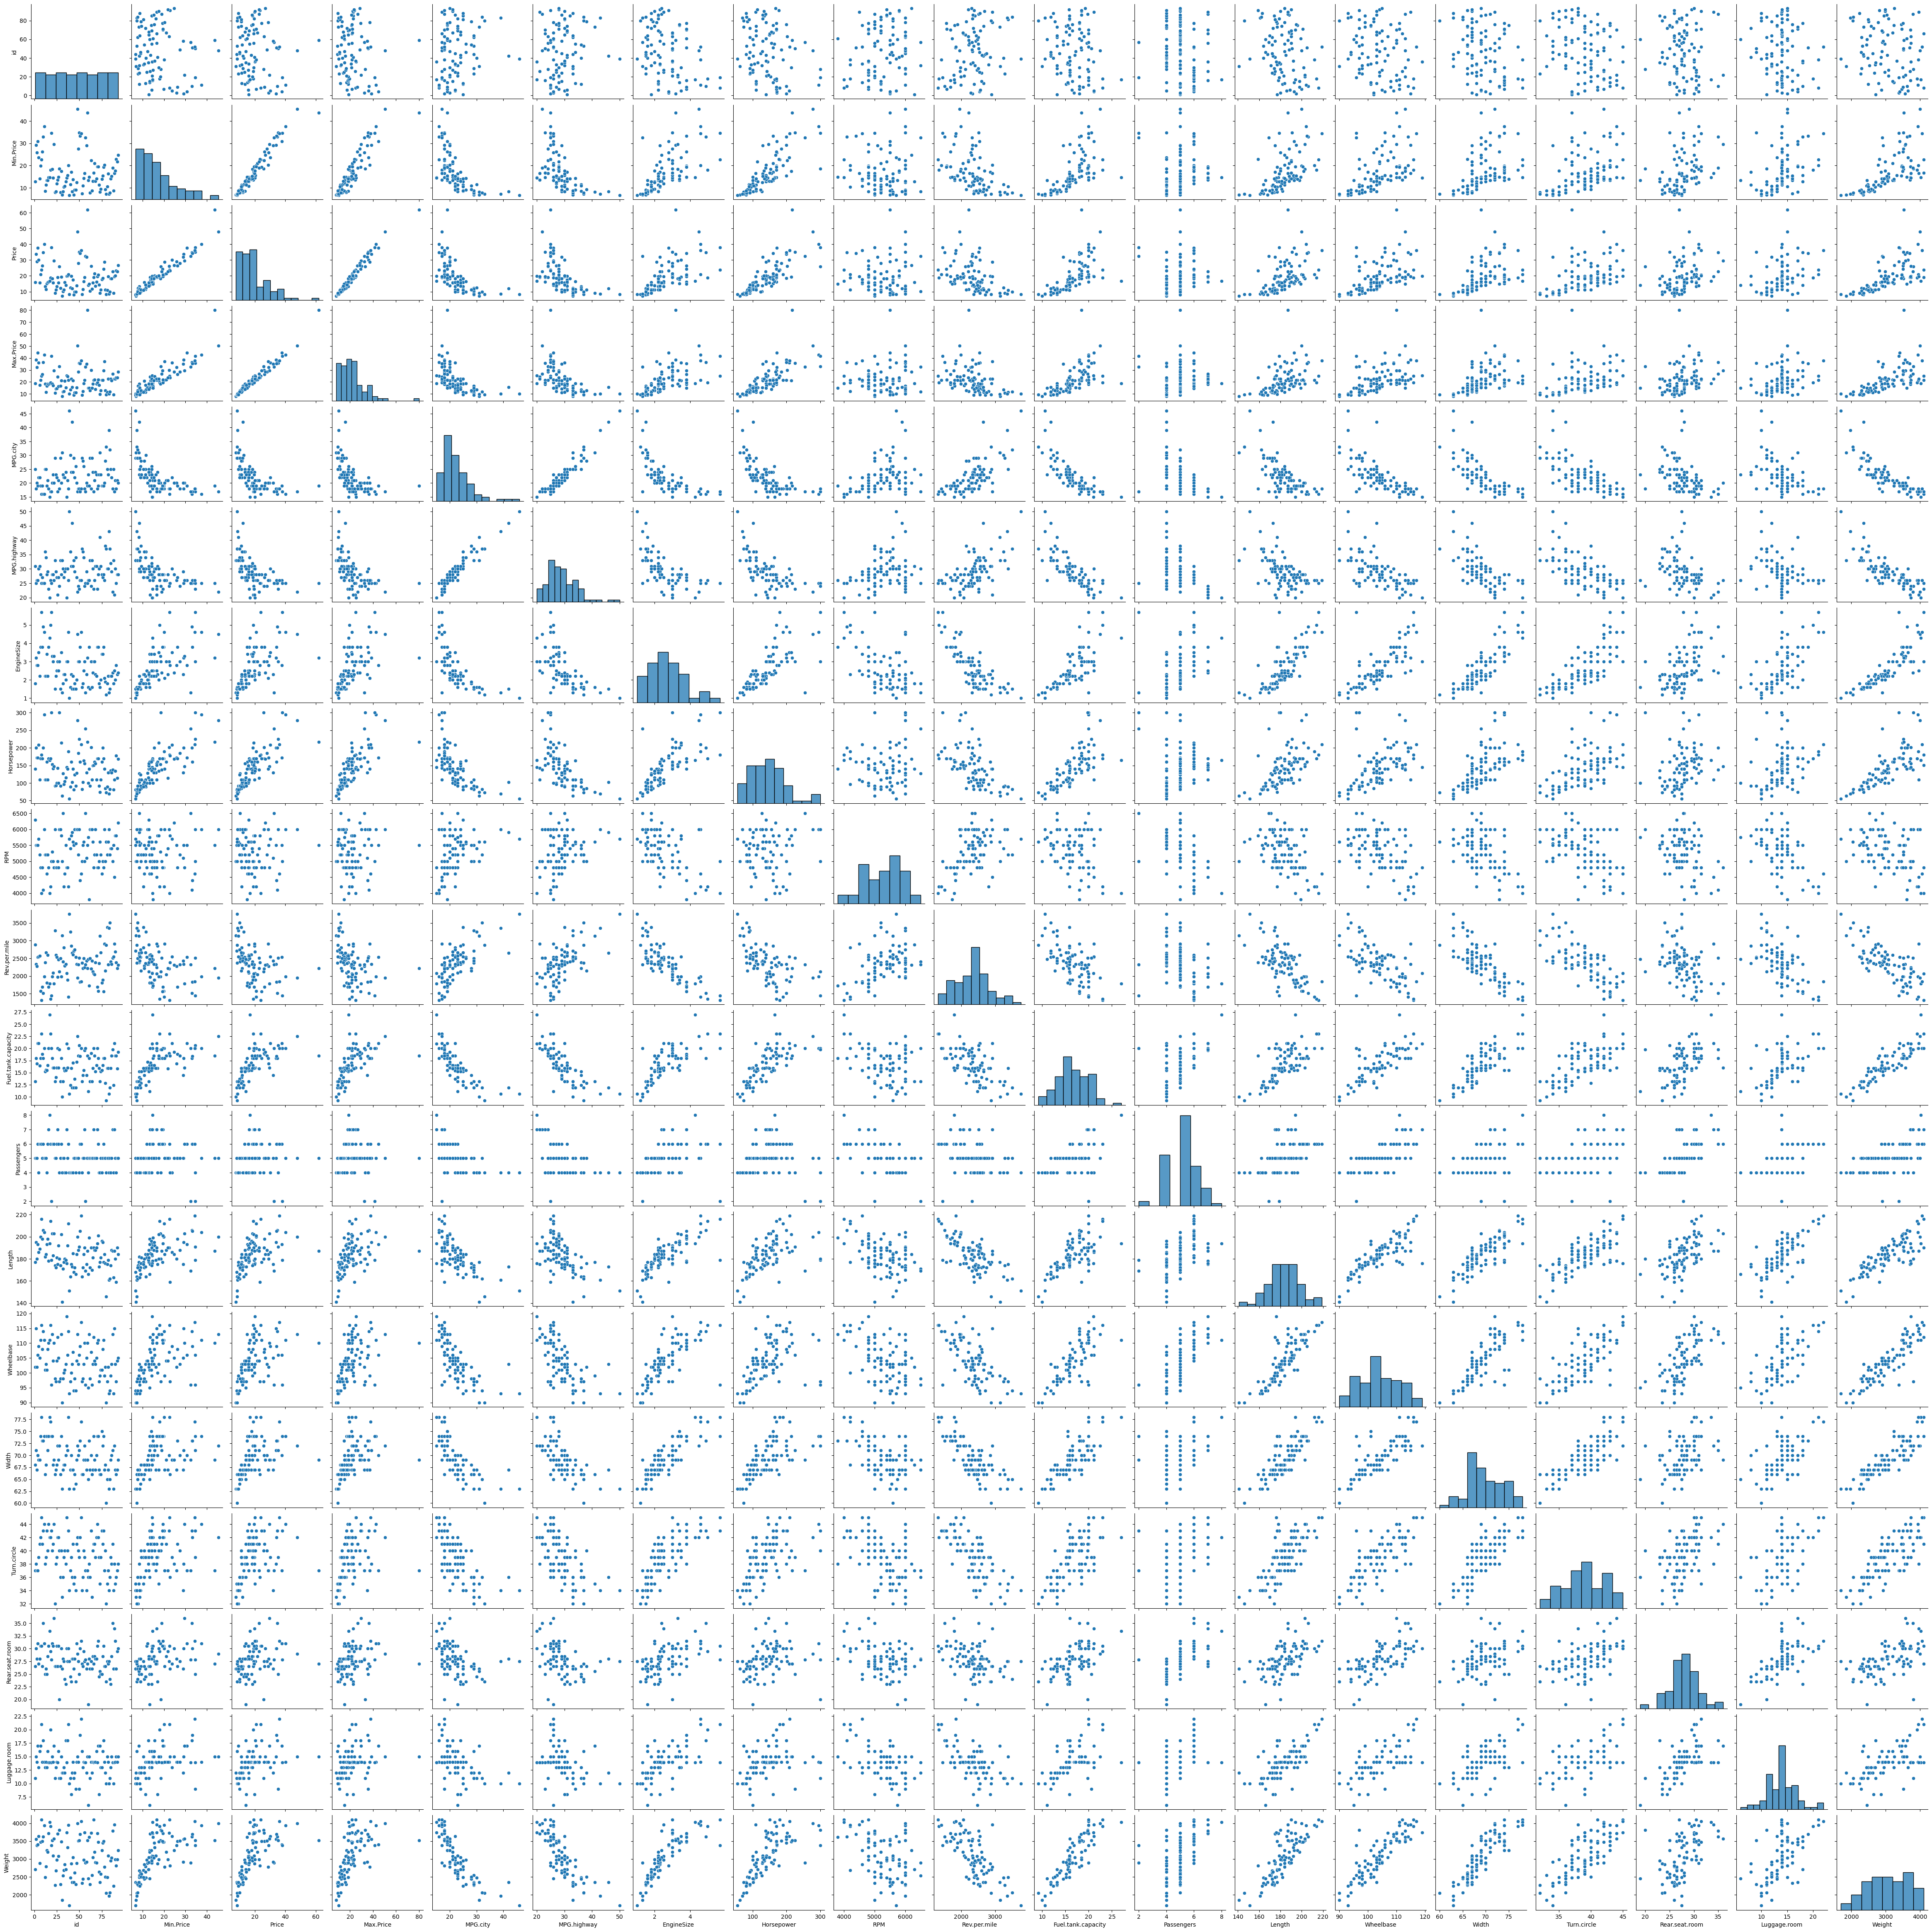

In [32]:
sns.pairplot(Xcon)

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


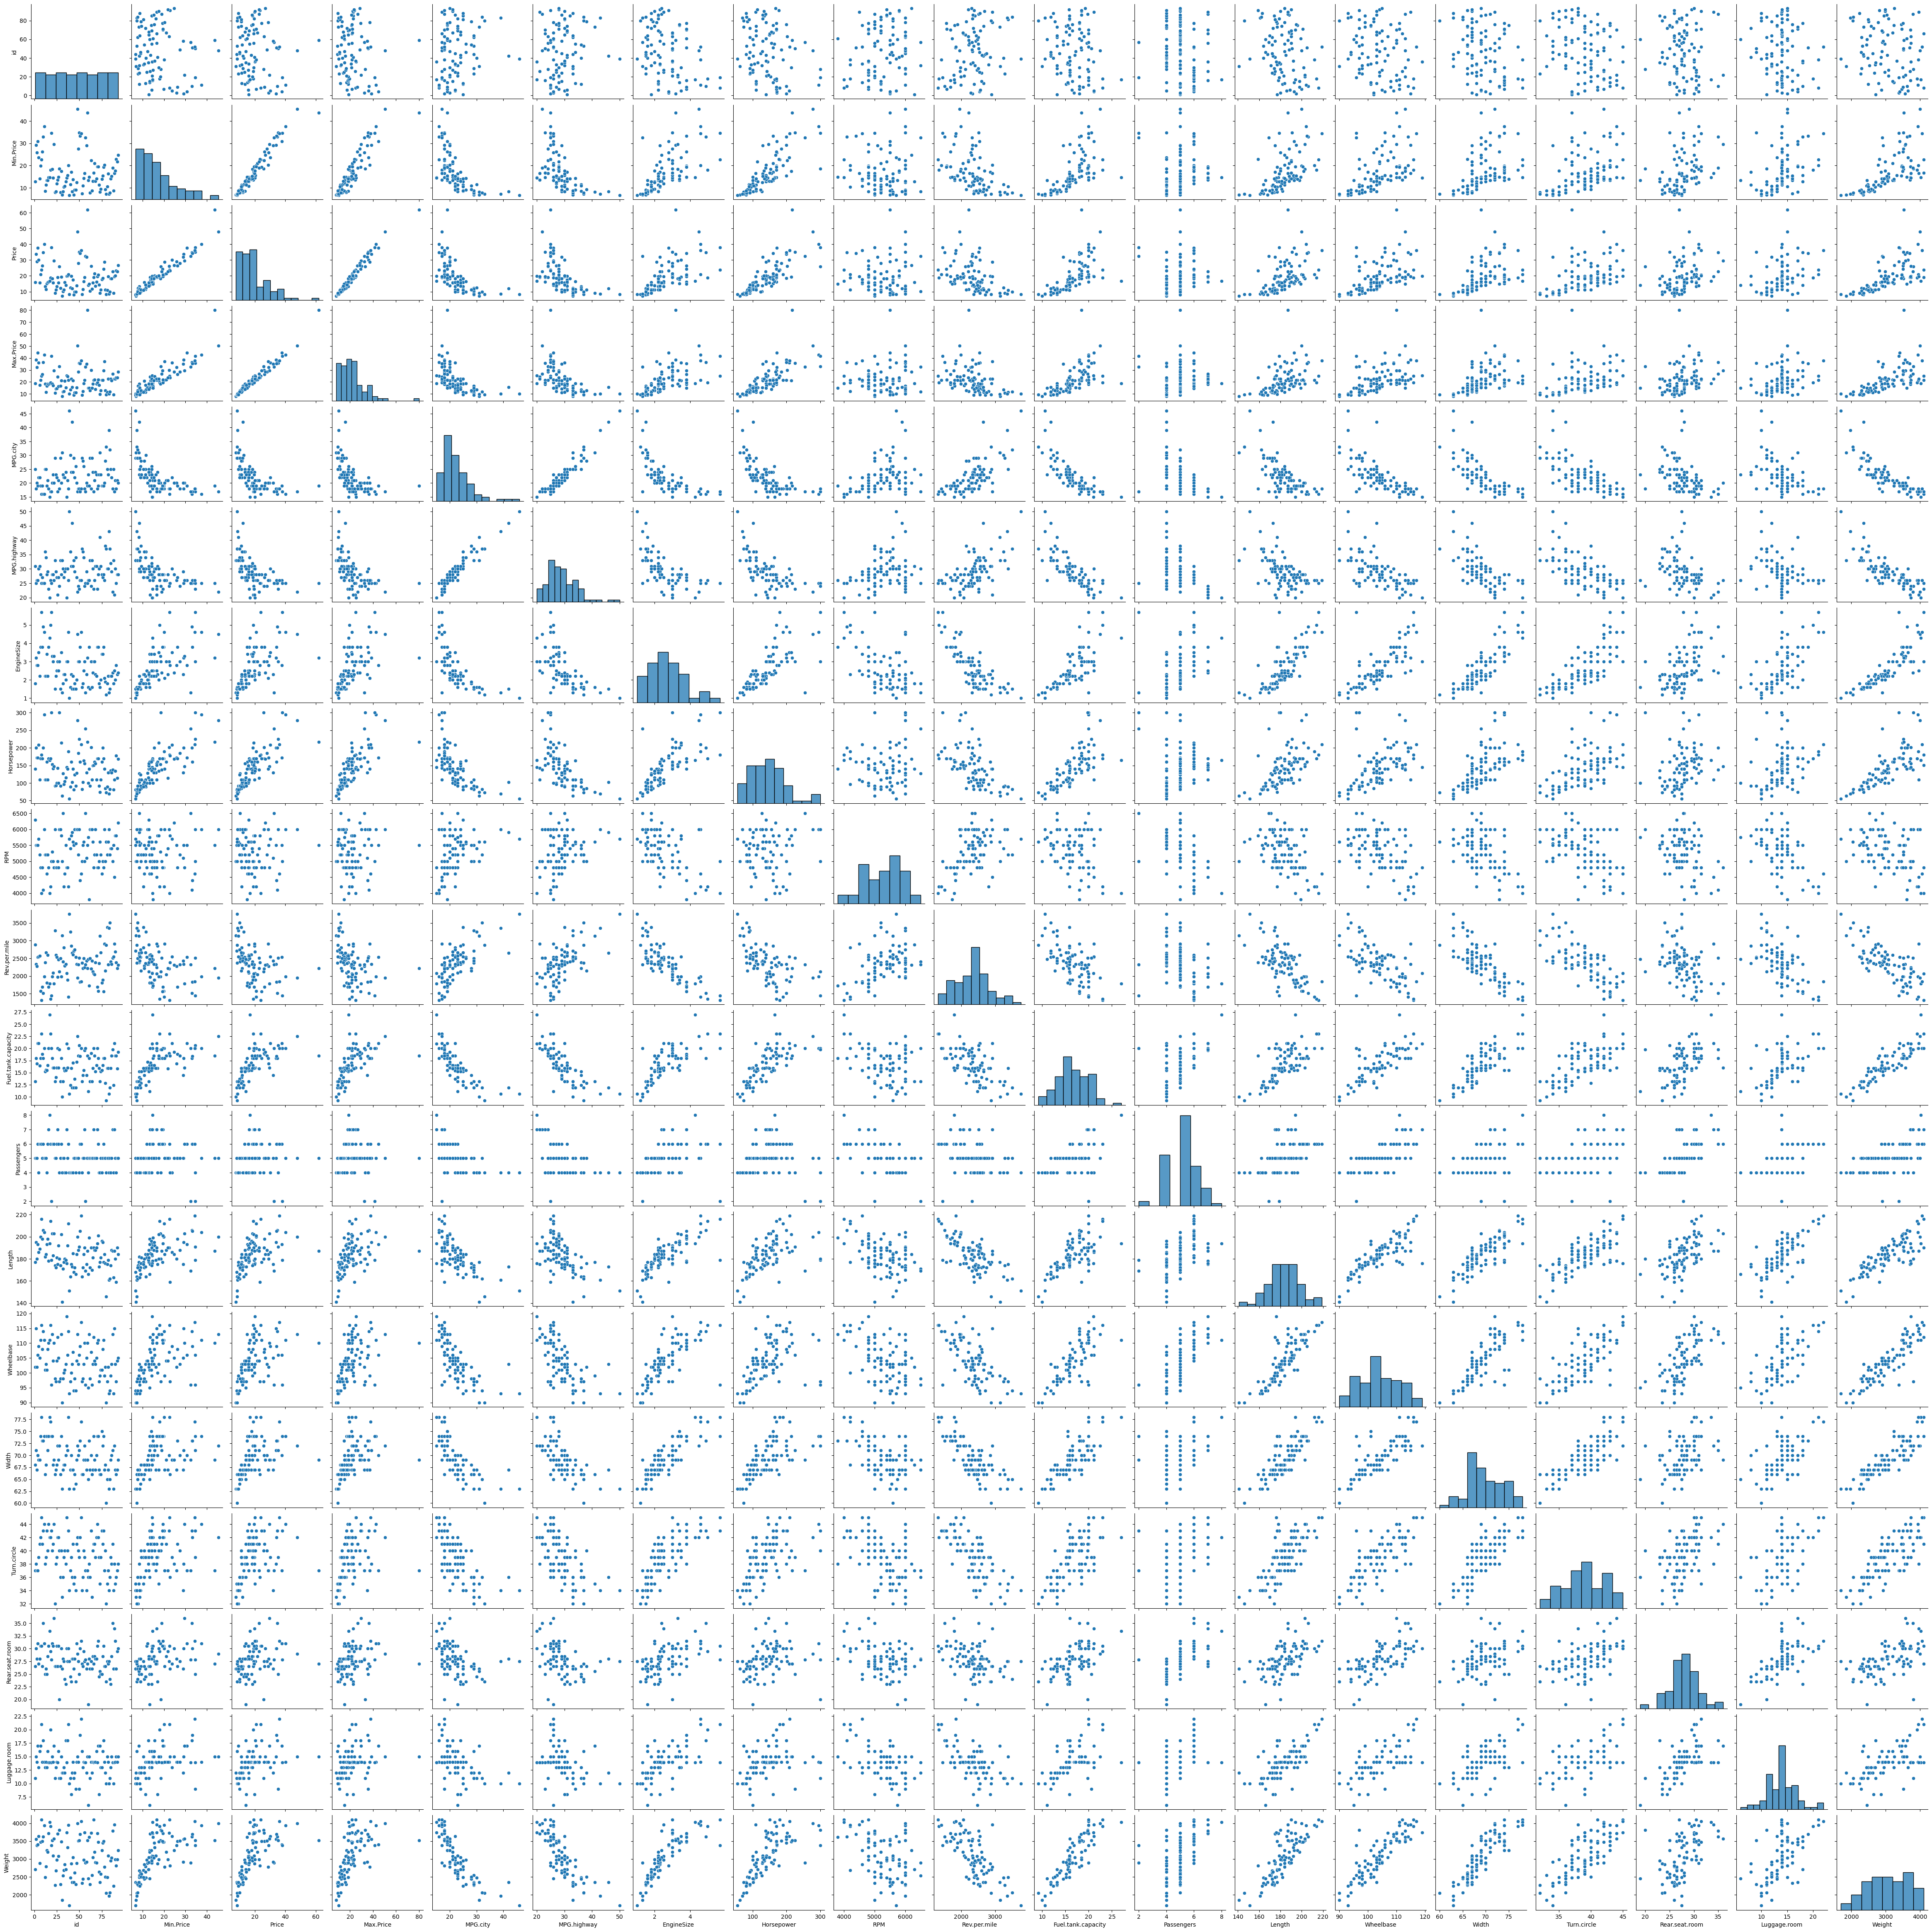

In [33]:
sns.pairplot(data=Xcon)

# Advance Analysis

In [34]:
# show the total sum of price of each Origin.

In [35]:
df.groupby(by='Origin')['Price'].sum()

Origin
USA        891.5
non-USA    922.9
Name: Price, dtype: float64

<Axes: xlabel='Origin'>

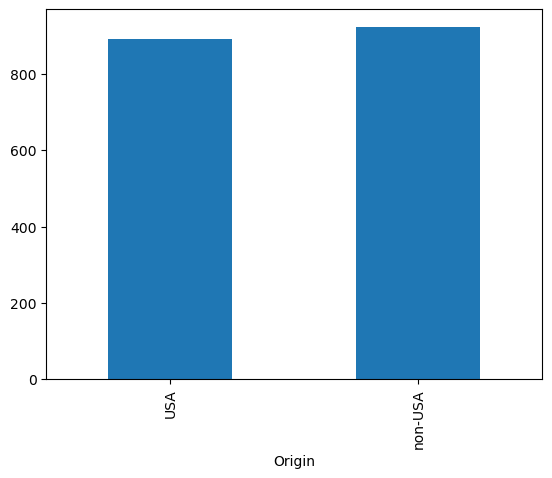

In [36]:
df.groupby(by='Origin')['Price'].sum().plot(kind='bar')

In [37]:
#

In [38]:
df.groupby('Type')['Price'].max()

Type
Compact    31.9
Large      36.1
Midsize    61.9
Small      15.9
Sporty     38.0
Van        22.7
Name: Price, dtype: float64

<Axes: ylabel='Type'>

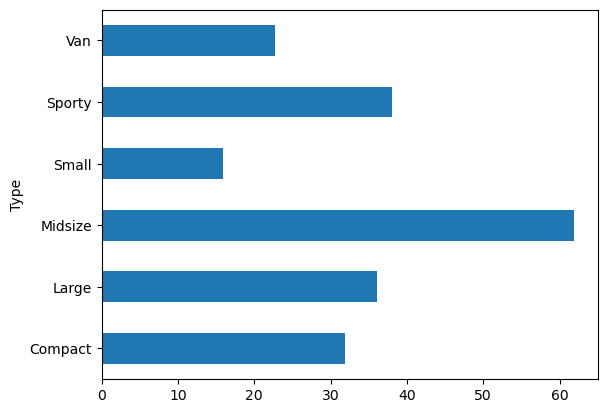

In [39]:
df.groupby('Type')['Price'].max().plot(kind='barh')

In [40]:
#

In [42]:
df.groupby('Type')['Price'].mean()

Type
Compact    18.212500
Large      24.300000
Midsize    27.218182
Small      10.166667
Sporty     19.392857
Van        19.100000
Name: Price, dtype: float64

In [44]:
df.groupby('Type')['Price'].mean().sort_values(ascending=False).head(2)

Type
Midsize    27.218182
Large      24.300000
Name: Price, dtype: float64

<Axes: xlabel='Type'>

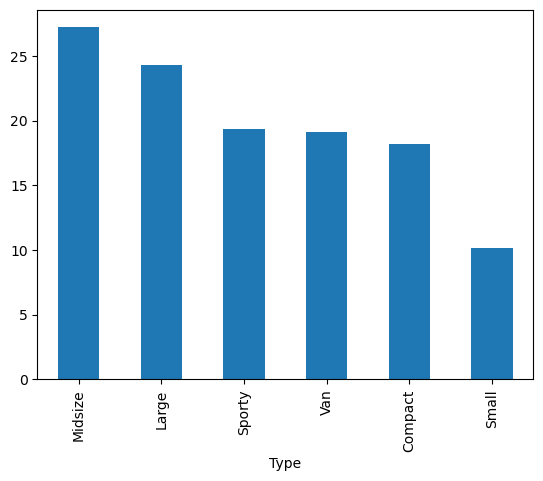

In [45]:
df.groupby('Type')['Price'].mean().sort_values(ascending=False).plot(kind='bar')